# Librerias

In [1]:
#Importemos las librerias Necesarias:
import scipy as sc
import pandas as pd
import numpy as np
import matplotlib

In [2]:
import sklearn as skl

***

## 1. Busca y descarga el conjunto de datos “Climate Model Simulation Crashes” del repositorio UCI Machine Learning. Tiene los datos de un problema de clasificación.
## 2. Cárgalo adecuadamente en un Pandas DataFrame.

In [3]:
# Leamos los datos:
rf = open('pop_failures.csv', 'r')  # Abrimos el archivo

# Obtenemos los nombres de las columnas:
cols = list()
for item in rf.readline()[:-1].split(' '):
    if item is not '':
        cols.append(item)

# Limpiamos el resto de infromacion convirtiendola en una lista de listas
data = list()        
for item in rf.readlines():
    list(item.strip().split())
    data.append(list(item.strip().split()))

In [4]:
#contertimos lo anterior en un DataFrame
df = pd.DataFrame(data, columns=cols)

#convirtamos la informacion a su tipo correspondiente:
for col in cols:
    df[col] = pd.to_numeric(df[col])
    
df.head()

,Study,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,...,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl,outcome
0,1,1,0.859036,0.927825,0.252866,0.298838,0.170521,0.735936,0.428325,0.567947,...,0.245675,0.104226,0.869091,0.997518,0.448620,0.307522,0.858310,0.796997,0.869893,0
1,1,2,0.606041,0.457728,0.359448,0.306957,0.843331,0.934851,0.444572,0.828015,...,0.616870,0.975786,0.914344,0.845247,0.864152,0.346713,0.356573,0.438447,0.512256,1
2,1,3,0.997600,0.373238,0.517399,0.504993,0.618903,0.605571,0.746225,0.195928,...,0.679355,0.803413,0.643995,0.718441,0.924775,0.315371,0.250642,0.285636,0.365858,1
3,1,4,0.783408,0.104055,0.197533,0.421837,0.742056,0.490828,0.005525,0.392123,...,0.471463,0.597879,0.761659,0.362751,0.912819,0.977971,0.845921,0.699431,0.475987,1
4,1,5,0.406250,0.513199,0.061812,0.635837,0.844798,0.441502,0.191926,0.487546,...,0.551543,0.743877,0.312349,0.650223,0.522261,0.043545,0.376660,0.280098,0.132283,1


## 3. Realiza un conteo de las clases y analiza si hay desequilibrio.

In [5]:
df[cols[-1]].describe()

count    540.000000
mean       0.914815
std        0.279416
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: outcome, dtype: float64

In [6]:
# aprovecharemos que nos encontramos antes un problema de clasificación binaria:
print(f'Outcome positivo:{df[df[cols[-1]] == 1].shape[0]}\nOutcome negativo:{df[df[cols[-1]] == 0].shape[0]}')

Outcome positivo:494
Outcome negativo:46


Podemos apreciar que la calse objetivo muestra un desequilibrio hacia un resultado positivo.


## 4.Evalua el rendimiento del modelo k-Nearest Neigbours mediante las tres estrategias de validación cruzada estudiados y utilizando la métrica que consideres más adecuada.

In [7]:
# Importemos el modelo a emplear:
import random
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.utils import *

In [8]:
df_ = df[df[cols[-1]] == 1] # Creamos un dataset con la variable objetivo = 1

#creemos un df sobre samplado con 150 muestras de outcome = 0
seed = random.randint(0,10)

df_rsmpl = resample(
    df[df[cols[-1]] == 0],
    random_state = seed,
    n_samples = 150
)

# Unamos ambos df
df_res = pd.concat([df_, df_rsmpl]).sample(frac=1)
df_res.shape

(644, 21)

In [9]:
# Vistoi que el DF no es excesivamente greande, emplearemos K=3
X = df_res.drop(cols[-1], axis=1)
y = df_res[cols[-1]]

model = KNC(n_neighbors=3)
#model.fit(df_res.drop(cols[-1], axis=1), df_res[cols[-1]])
X.shape, y.shape

((644, 20), (644,))

**K_Fold**

0.8694352159468438


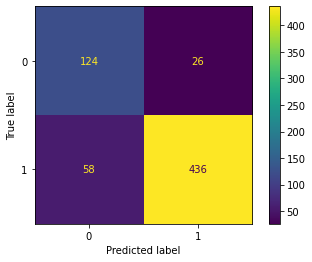

In [10]:
k = 15

seed = random.randint(0,10)
kfold = KFold(n_splits=k, random_state=seed, shuffle=True)
kf_pred = cross_val_predict(model, X, y, cv=kfold)
print(cross_val_score(model, X, y, cv=kfold).mean())

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y, kf_pred)).plot()
matplotlib.pyplot.show()

Como se puede apreciar en la matriz de confusión, el modelo presenta un overfitting bastante acentuado.

**Leave_One_Out**

0.8742236024844721


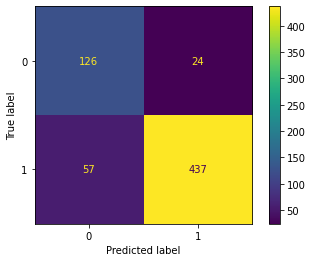

In [11]:
lvoo_pred = cross_val_predict(model, X, y, cv=LeaveOneOut())
print(cross_val_score(model, X, y, cv=LeaveOneOut()).mean())

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y, lvoo_pred)).plot()
matplotlib.pyplot.show()

**Montecarlo**

In [12]:
k = 15
test_split = 0.35
seed = random.randint(0,10)
mtcarlo = ShuffleSplit(n_splits=k, test_size=test_split, random_state=seed)
mt_predict = cross_val_score(model, X, y, cv=mtcarlo)
print(cross_val_score(model, X, y, cv=mtcarlo).mean())

0.812094395280236


Tras realizar un oversample para evitar que los modelos se fijaran solo en la clase mayoritaria, se ha conseguido que los modelos den una precisión superior al 80%. Se aprecia que las predicciones generadas por el modelo Leave One Out son ligeramente más precisas que las generadas por KFold así mismo, se observa que en el caso que nos ocupa el método Montecarlo es el menos preciso.

***

# Notas:

> Nota 1

# Bibliografia:

   * pandas: https://pandas.pydata.org
   * stack overflow: 